In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from distance_determination import get_current_freq
from simul.utilities.data import load_experiment
from simul.vis.signals import vis_signals
from tqdm.auto import tqdm, trange

%load_ext autoreload
%autoreload 2

In [2]:
from distance_determination import estimate_dist, simulate_signals
from run_experiment import experiments

exp_name = "default_full"
params = experiments[exp_name]
dist, signals_data = simulate_signals(params)

exp_name = "default"
params = experiments[exp_name]
dist, signals_data_pruned = simulate_signals(params)
# params, dist, signals_data, dist_probs = load_experiment("not_moving")

Simulating distances and signals:   0%|          | 0/23336 [00:00<?, ?it/s]

Simulating distances and signals:   0%|          | 0/23336 [00:00<?, ?it/s]

In [10]:
signals_data.shape

(40, 23336)

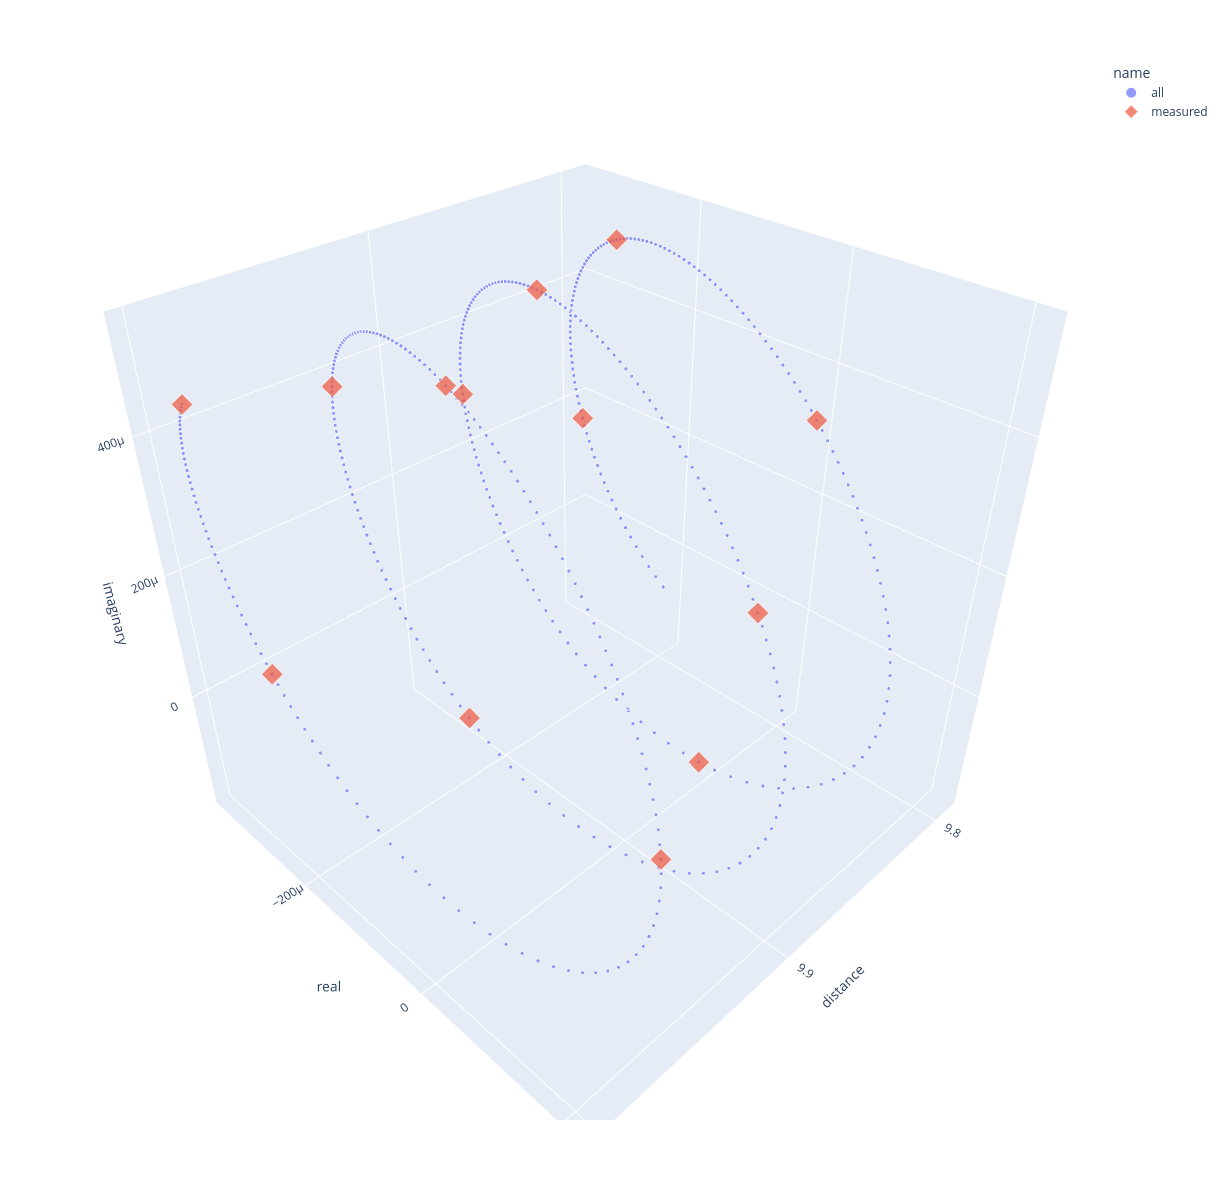

In [14]:
n = signals_data.shape[1]
n = 500
y = np.real(signals_data[:, :n])
z = np.imag(signals_data[:, :n])

y_ = np.real(signals_data_pruned[:, :n]).squeeze()
z_ = np.imag(signals_data_pruned[:, :n]).squeeze()

df = pd.DataFrame(
    [
        {
            "distance": x,
            "real": y,
            "imaginary": z,
            "freq": str(freq),
            "name": name,
            "size": size,
        }
        for reals, imags, name, size in (
            (y, z, "all", 0.1),
            (y_, z_, "measured", 1.0),
        )
        for freq, (real, imag) in enumerate(zip(reals, imags))
        for x, y, z in zip(dist[:n, 0], real, imag)
        if y != np.nan and freq == 0
    ]
)

px.scatter_3d(
    df,
    x="distance",
    y="real",
    z="imaginary",
    color="name",
    symbol="name",
    size="size",
    height=1200,
)

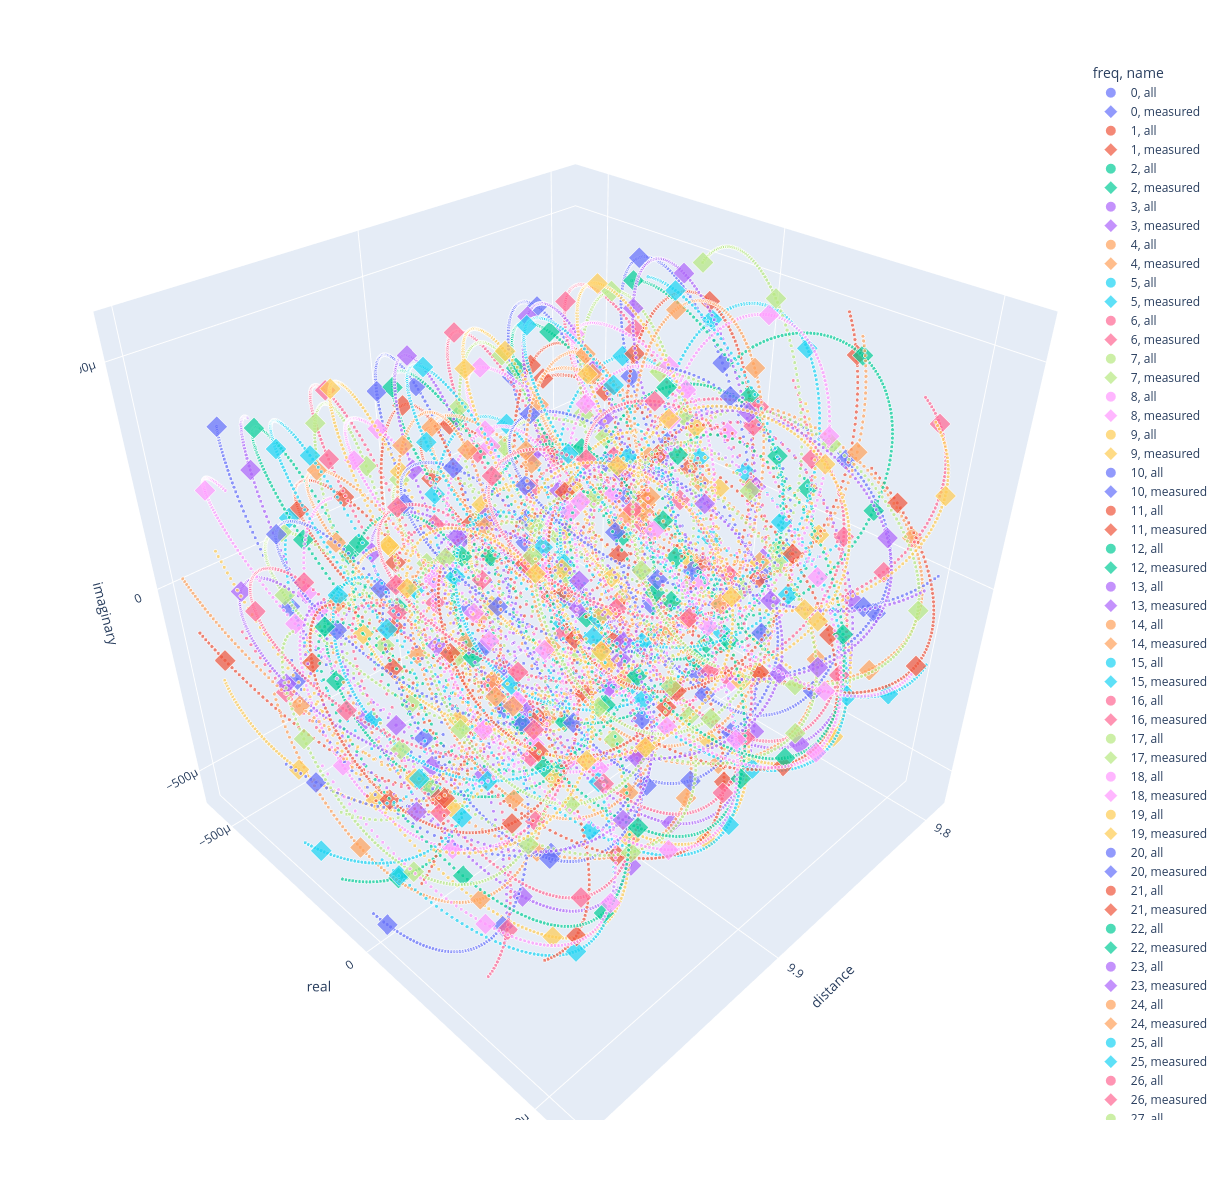

In [15]:
n = 500
y = np.real(signals_data[:, :n])
z = np.imag(signals_data[:, :n])

y_ = np.real(signals_data_pruned[:, :n]).squeeze()
z_ = np.imag(signals_data_pruned[:, :n]).squeeze()

df = pd.DataFrame(
    [
        {
            "distance": x,
            "real": y,
            "imaginary": z,
            "freq": str(freq),
            "name": name,
            "size": size,
        }
        for reals, imags, name, size in (
            (y, z, "all", 0.1),
            (y_, z_, "measured", 1.0),
        )
        for freq, (real, imag) in enumerate(zip(reals, imags))
        for x, y, z in zip(dist[:n, 0], real, imag)
        if y != np.nan
    ]
)

px.scatter_3d(
    df,
    x="distance",
    y="real",
    z="imaginary",
    color="freq",
    symbol="name",
    size="size",
    height=1200,
)